[Iris] Test Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        11

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



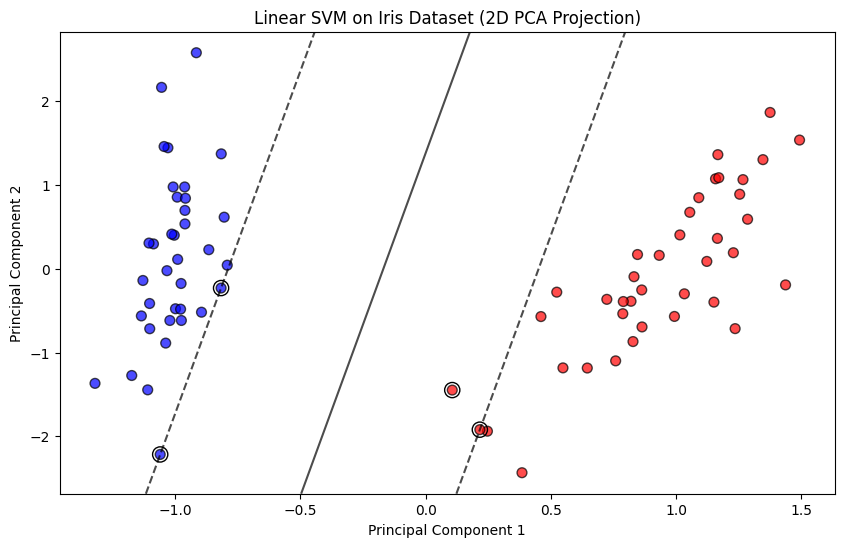

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report

# Load and filter for binary problem
iris = datasets.load_iris()
X = iris.data[iris.target != 2]
y = iris.target[iris.target != 2]

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit SVM
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)

# Evaluate
y_pred = svm.predict(X_test_scaled)
print("[Iris] Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot boundary
def plot_svm_decision_boundary(X, y, model):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=50, edgecolors='k', alpha=0.7)
    ax = plt.gca()
    xlim = ax.get_xlim(); ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 200)
    yy = np.linspace(ylim[0], ylim[1], 200)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='k', levels=[-1,0,1], alpha=0.7, linestyles=['--', '-', '--'])
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=120,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Linear SVM on Iris Dataset (2D PCA Projection)')
    plt.show()

plot_svm_decision_boundary(X_train_scaled, y_train, svm)


[Breast Cancer] Test Accuracy: 0.965034965034965
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        54
           1       0.96      0.99      0.97        89

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



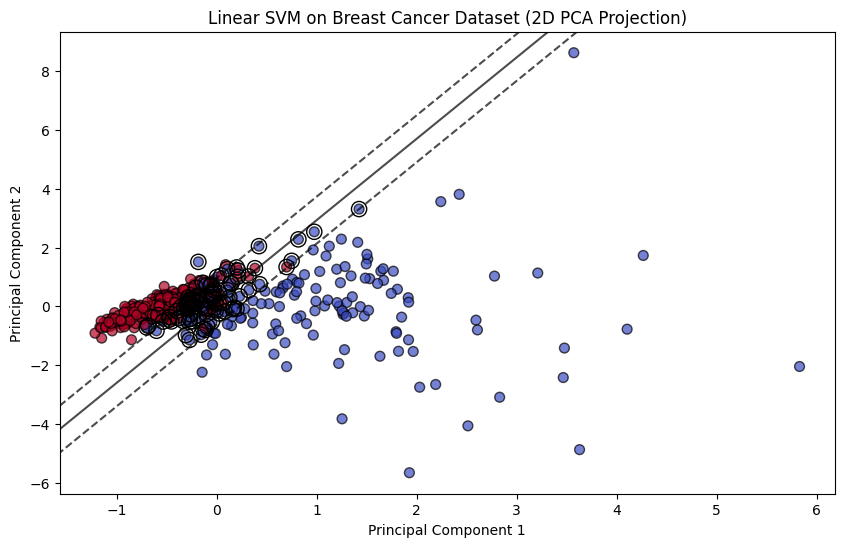

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit SVM
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)

# Evaluate
y_pred = svm.predict(X_test_scaled)
print("[Breast Cancer] Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot boundary
def plot_svm_decision_boundary(X, y, model):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50, edgecolors='k', alpha=0.7)
    ax = plt.gca()
    xlim = ax.get_xlim(); ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 200)
    yy = np.linspace(ylim[0], ylim[1], 200)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='k', levels=[-1,0,1], alpha=0.7, linestyles=['--', '-', '--'])
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=120,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Linear SVM on Breast Cancer Dataset (2D PCA Projection)')
    plt.show()

plot_svm_decision_boundary(X_train_scaled, y_train, svm)
